SOLUÇÃO DA EQUAÇÃO DA  ONDA ACÚSTICA PELO METODO DE DIFERENÇAS FINITAS

1. Introdução

O objetivo deste trabalho é simular parâmetros de aquisição sísmica real, construindo a geometria de aquisição a partir da disposição espacial de fontes e receptores. A modelagem computacional foi desenvolvida com base no método das diferenças finitas de oitava ordem, aplicado à resolução da equação da onda acústica em duas dimensões.

O modelo Marmousi foi utilizado para as comparações por ser amplamente empregado em estudos sísmicos por sua complexidade geológica. Para melhorar o desempenho computacional, a biblioteca Numba foi integrada ao código Python, possibilitando processamento paralelo eficiente. Além disso, foi incorporada uma máscara de atenuação nas bordas, conforme proposto por Cerjan, com o objetivo de minimizar reflexões artificiais nas bordas do modelo e assim aproximar a simulação de um cenário mais realista.

Com esses aprimoramentos, realizamos a validação dos modelos numéricos e aquele obtido pela solução analítica da aproximação da anisotropia fraca. As frentes de onda analíticas foram sobrepostas aos snapshots gerados numericamente, permitindo uma análise qualitativa entre os modelos. 

Complementarmente, foi realizada uma simulação sísmica em um meio anisotrópico do tipo VTI (Vertical Transversely Isotropic), no qual as propriedades elásticas exibem simetria axial em relação à direção vertical. O objetivo principal desta modelagem foi avaliar numericamente a propagação da frente de onda em meio VTI e compará-la a propagação acústica para o modelo de velocidade Marmousi. Essa abordagem permite analisar os efeitos da anisotropia na propagação sísmica.

Importando wavefield

In [2]:
from AcousticSeismicModeling2D import wavefield
import copy

#Marmousi wavefield
wf_Marmousi_Acoustico = wavefield()
wf_Marmousi_Acoustico.approximation = 'acoustic'

wf_Marmousi_Acoustico.createSourceWavelet()

wf_Marmousi_VTI = copy.deepcopy(wf_Marmousi_Acoustico)
wf_Marmousi_VTI .approximation = 'acousticVTI'

wf_Marmousi_Acoustico.initializeWavefields()
wf_Marmousi_VTI.initializeWavefields()
wf_Marmousi_Acoustico.checkDispersionAndStability()
wf_Marmousi_VTI .checkDispersionAndStability()
wf_Marmousi_Acoustico.SolveWaveEquation()
wf_Marmousi_VTI .SolveWaveEquation()

#Qsv wavefield

wf_QSV = wavefield("../inputs/parametersQSV.json")
wf_QSV_Solution= wavefield("../inputs/parametersQSVsolution.json")

wf_QSV.approximation = 'acousticVTI'
wf_QSV_Solution.approximation = 'acousticVTI'

wf_QSV.createSourceWavelet()
wf_QSV_Solution.createSourceWavelet()

wf_QSV.initializeWavefields()
wf_QSV_Solution.initializeWavefields()

wf_QSV.checkDispersionAndStability()
wf_QSV_Solution.checkDispersionAndStability()

wf_QSV.SolveWaveEquation()
wf_QSV_Solution.SolveWaveEquation()

# Analytical Comparison wavefield

wf_Analytical_Acoustic = wavefield("../inputs/parametersAnalytical.json")
wf_Analytical_Acoustic.approximation = 'acoustic'
wf_Analytical_Acoustic.createSourceWavelet()

wf_Analytical_VTI = copy.deepcopy(wf_Analytical_Acoustic)
wf_Analytical_VTI.approximation = 'acousticVTI'
wf_Analytical_Acoustic.initializeWavefields()
wf_Analytical_VTI.initializeWavefields()

wf_Analytical_Acoustic.checkDispersionAndStability()
wf_Analytical_VTI.checkDispersionAndStability()

wf_Analytical_Acoustic.SolveWaveEquation()
wf_Analytical_VTI.SolveWaveEquation()

info: Imported: ../inputs/receivers.csv
info: Imported: ../inputs/sources.csv
info: Ricker Source wavelet created: 4001 samples
info: Wavefields initialized: 383x141x4001
info: Imported: ../inputs/marmousi_vp_383x141.bin
info: Wavefields initialized: 383x141x4001
info: Imported: ../inputs/marmousi_vp_383x141.bin
info: Imported: ../inputs/marmousi_vp_383x141_epsilon.bin
info: Imported: ../inputs/marmousi_vp_383x141_delta.bin
info: Dispersion and stability check
info: Minimum velocity: 1500.00 m/s
info: Maximum velocity: 5500.00 m/s
info: Maximum frequency: 60.00 Hz
info: Current dx: 10.00 m
info: Current dt: 0.00050 s
info: Critical dx: 5.00 m
info: Critical dt: 0.00023 s
info: Dispersion and stability check
info: Minimum velocity: 1500.00 m/s
info: Maximum velocity: 7240.10 m/s
info: Maximum frequency: 60.00 Hz
info: Current dx: 10.00 m
info: Current dt: 0.00050 s
info: Critical dx: 5.00 m
info: Critical dt: 0.00017 s
info: Solving acoustic wave equation
info: Model expanded to 241x483

Parâmetros para o modelo de velocidade Marmousi

In [3]:
import json

with open("../inputs/parametersMarmousi.json") as f:
    parameters = json.load(f)

for key, value in parameters.items():
    print(f"{key}: {value}")



dx: 10.0
dz: 10.0
dt: 0.0005
L: 3820
D: 1400
T: 2
N_abc: 50
fcut: 60.0
rec_file: ../inputs/receivers.csv
src_file: ../inputs/sources.csv
vpFile: ../inputs/marmousi_vp_383x141.bin
epsilonFile: ../inputs/marmousi_vp_383x141_epsilon.bin
epsilonLayer1: None
epsilonLayer2: None
deltaLayer1: None
deltaLayer2: None
deltaFile: ../inputs/marmousi_vp_383x141_delta.bin
snap: False
frame: [500, 750, 1000]
folderSnapshot: ../outputs/snapshots/
seismogramFolder: ../outputs/seismograms/


Parâmetros para a validação com a solução analítica

In [4]:
import json

with open("../inputs/parametersAnalytical.json") as f:
    parameters = json.load(f)

for key, value in parameters.items():
    print(f"{key}: {value}")



dx: 10.0
dz: 10.0
dt: 0.0005
L: 3820
D: 1400
T: 2
N_abc: 50
fcut: 60.0
rec_file: ../inputs/receivers.csv
src_file: ../inputs/sourcesAnalytical.csv
vpFile: None
epsilonFile: None
deltaFile: None
epsilonLayer1: 0.2
epsilonLayer2: 0.2
deltaLayer1: 0.2
deltaLayer2: 0.2
snap: False
frame: [500]
folderSnapshot: ../outputs/snapshots/
seismogramFolder: ../outputs/seismograms/


Parâmetros para demonstração do artefato da onda qSV

In [5]:
import json

with open("../inputs/parametersQSV.json") as f:
    parameters_QSV = json.load(f)
    
for key, value in parameters_QSV.items():
    print(f"{key}: {value}")

dx: 10.0
dz: 10.0
dt: 0.0005
L: 3820
D: 1400
T: 2
N_abc: 50
fcut: 60.0
rec_file: ../inputs/receivers.csv
src_file: ../inputs/sources.csv
vpFile: None
epsilonFile: None
deltaFile: None
epsilonLayer1: 0.2
epsilonLayer2: 0.2
deltaLayer1: 0.1
deltaLayer2: 0.1
snap: False
frame: [750]
folderSnapshot: ../outputs/snapshots/
seismogramFolder: ../outputs/seismograms/


Parâmetros para resolução do artefato da onda qSV

In [6]:
import json

with open("../inputs/parametersQSVsolution.json") as f:
    parameters_QSV_solution = json.load(f)

for key, value in parameters_QSV_solution.items():
    print(f"{key}: {value}")

dx: 10.0
dz: 10.0
dt: 0.0005
L: 3820
D: 1400
T: 2
N_abc: 50
fcut: 60.0
rec_file: ../inputs/receivers.csv
src_file: ../inputs/sources.csv
vpFile: None
epsilonFile: None
deltaFile: None
epsilonLayer1: 0
epsilonLayer2: 0.2
deltaLayer1: 0
deltaLayer2: 0.1
snap: False
frame: [750]
folderSnapshot: ../outputs/snapshots/
seismogramFolder: ../outputs/seismograms/


2. Parâmetros de aquisição

2.1 Receptores e Fontes

Para levantamentos sísmicos são pré estabelecidos posições para os tiros e receptores, estes arranjos são utilizados para mapear as respostas a propagação das perturbações causadas pelas fontes sísmicas, que serão captadas pelos receptores. O arranjo escolhido foram receptores a 100m da superfície, 1 a cada 10 metros ao longo da distância total de 3820m; para a fonte foi posicionada uma em 1910m. A função fonte adotada é a segunda derivada de uma Gaussiana que podemos controlar a frequência de corte contida no sinal.


Modelo Marmousi, epsilon e delta

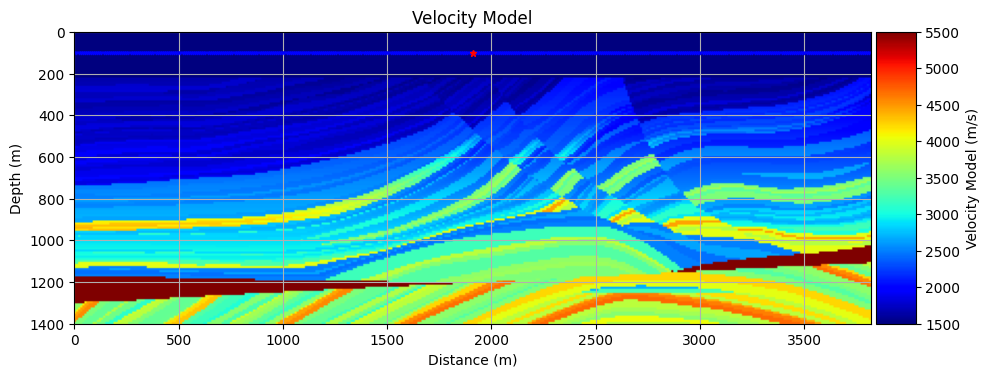

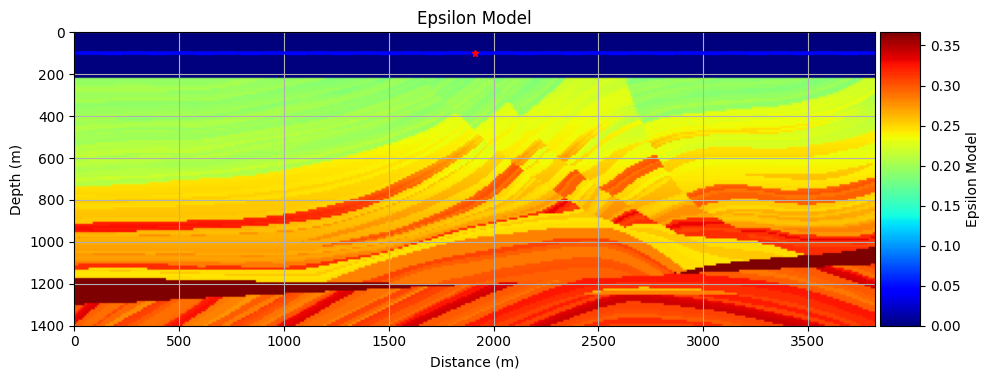

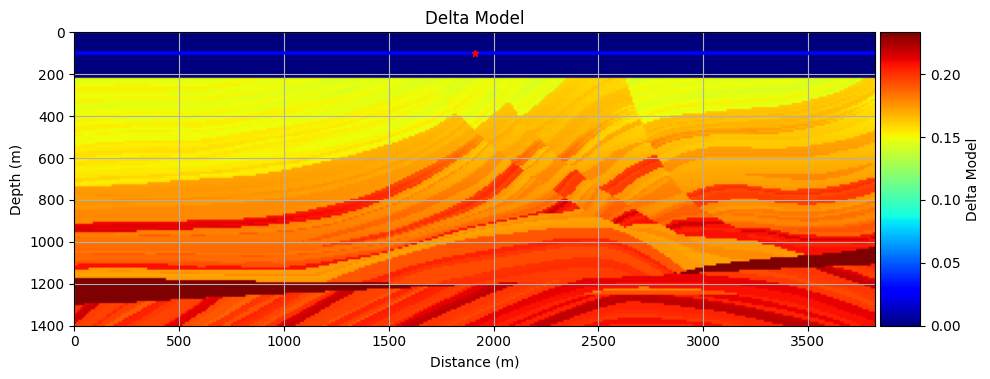

In [7]:
wf_Marmousi_VTI.viewAllModels()

Modelo de velocidade, epsilon e delta usados para a comparação com a solução analítica

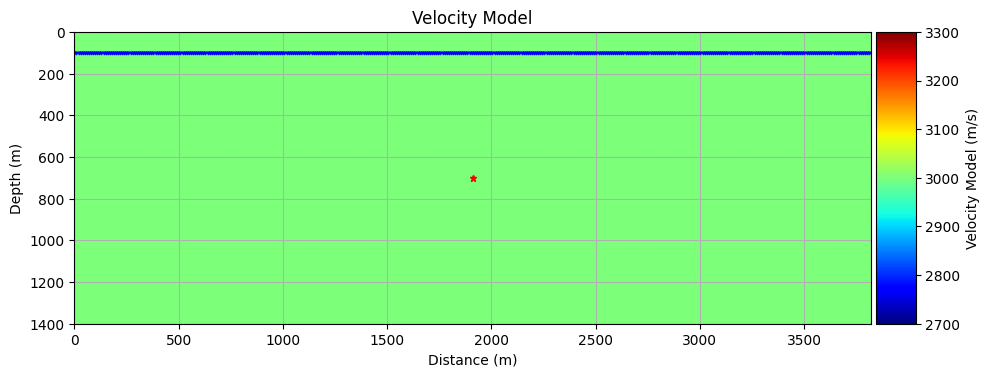

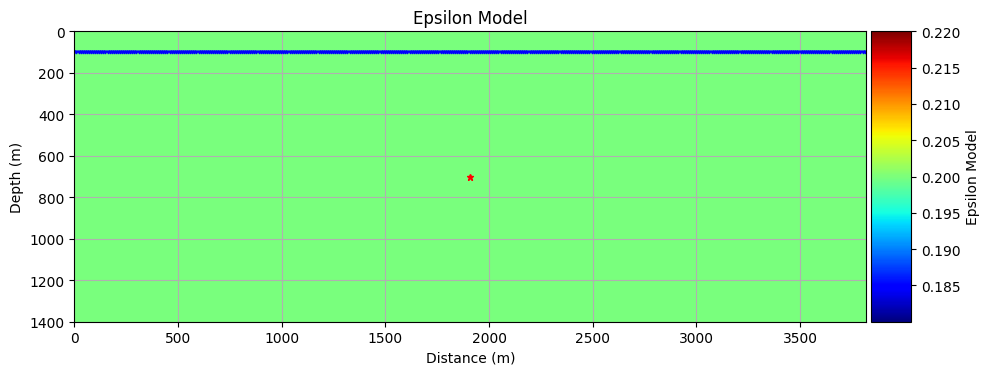

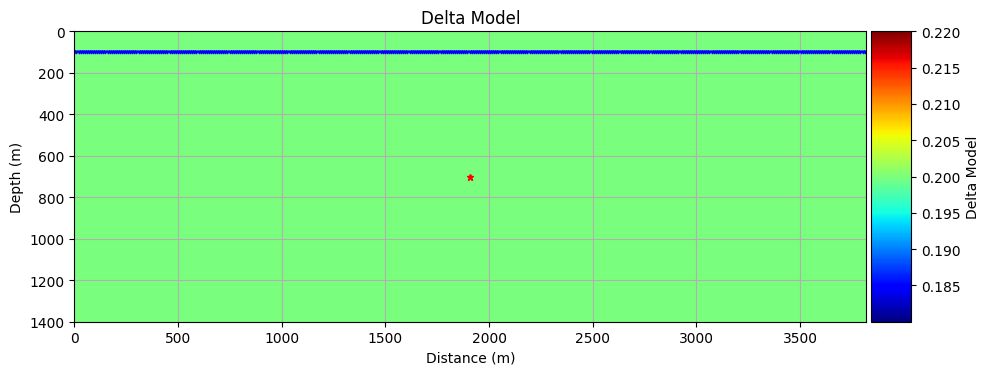

In [8]:
wf_Analytical_VTI.viewAllModels()

Modelo velocidade, epsilon e delta para a demonstração e solução do artefato produzido pela onda qSV

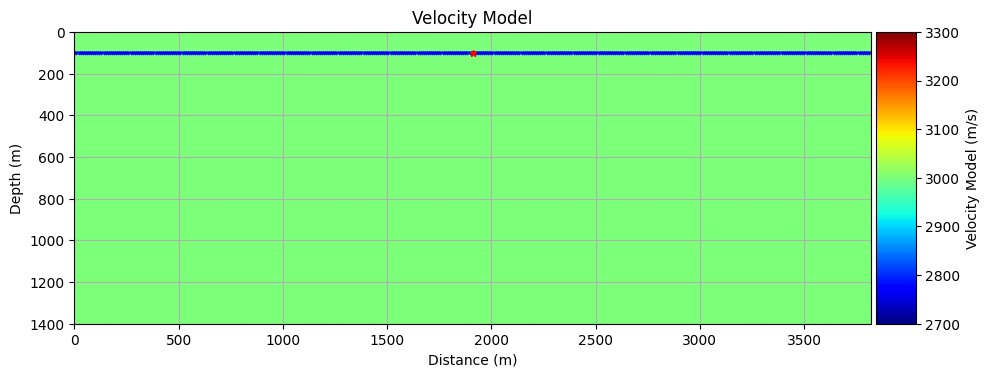

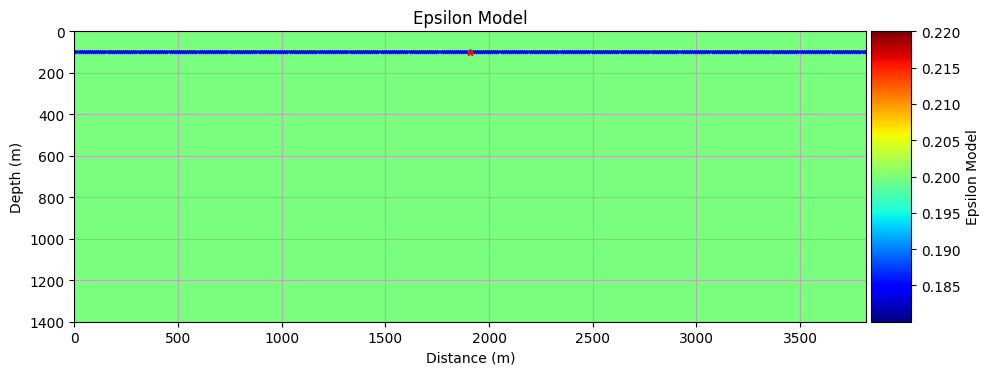

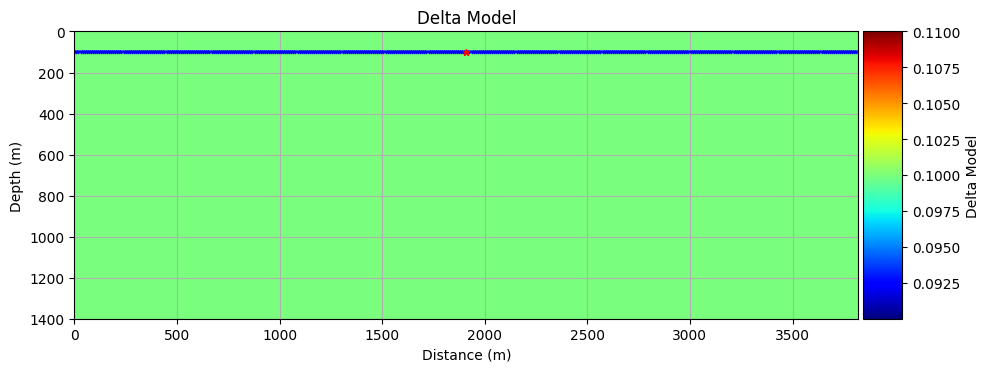

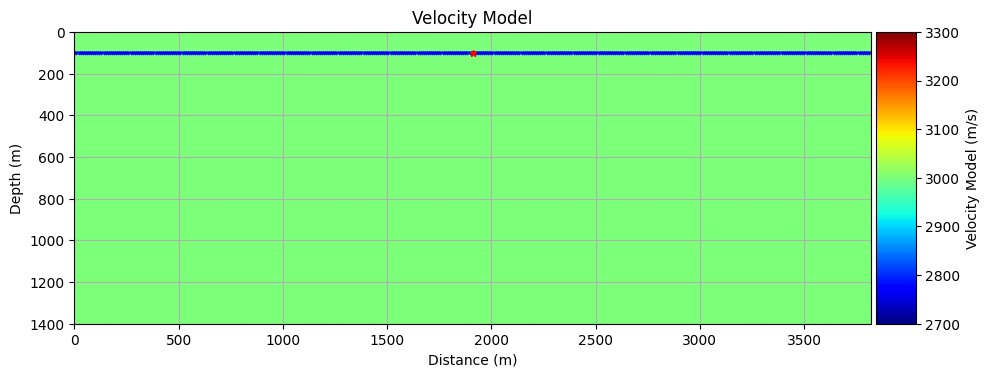

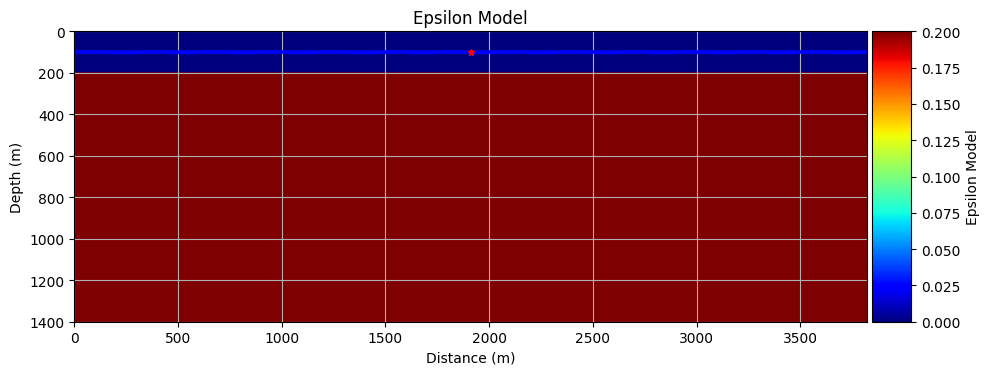

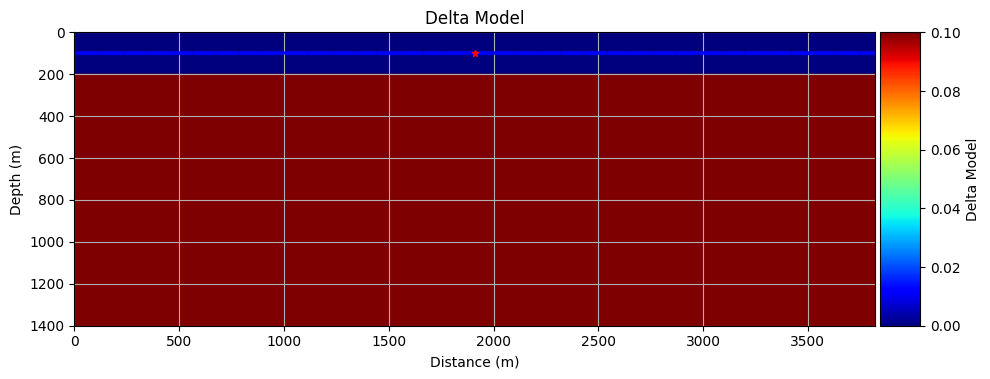

In [9]:
wf_QSV.viewAllModels()
wf_QSV_Solution.viewAllModels()

Fonte sísmica 

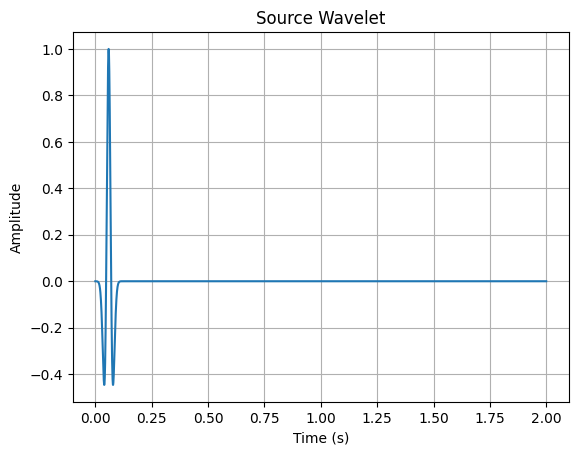

In [10]:
wf_Marmousi_Acoustico.viewSourceWavelet()

3. Modelagem sísmica

3.1 Método das diferenças finitas

A solução da equação da onda de forma discreta num grid com dx e dz foram obtidas a partir da expansão em série de Taylor com operadores de oitava ordem para a solução das segundas derivadas no tempo e espaço. Substituindo as segundas derivadas na equação da onda é possível obter o campo de pressão num instante posterior t+1 a partir do campo nos instantes t e t-1. Repetindo esse processo num loop podemos determinar a propagação da onda em cada instante do tempo.

A equação usada para descrever a propagação no meio VTI pode ser expressa por:

$\frac{1}{v_{pz}^2}\frac{\partial^2 p}{\partial t^2} = (1 + 2 \epsilon) \frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 q}{\partial z^2}$

$\frac{1}{v_{pz}^2}\frac{\partial^2 q}{\partial t^2} = (1 + 2 \delta) \frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 q}{\partial z^2}$ 

Aproximação da segunda derivada no tempo:

$\frac{\partial^2 p(x,z)}{\partial t^2} \approx \frac{1}{\Delta t^2}\left[b_0 p_{i,k}^n + \sum_{m=1}^{N/2} b_m \left( p_{i,k}^{n+m} + p_{i,k}^{n-m}\right)\right]
\quad m \in \{1, 2, 3, \dots\}$

Aproximação da segunda derivada em x:

$\frac{\partial^2 p(x,z)}{\partial x^2} \approx \frac{1}{h^2}\left[b_0 p_{i,k}^n + \sum_{j=1}^{N/2} b_j \left( p_{i+j,k}^n + p_{i-j,k}^n \right)\right]
\quad j \in \{1, 2, 3, \dots\}$

Aproximação da segunda derivada em z:

$\frac{\partial^2 p(x,z)}{\partial z^2} \approx \frac{1}{h^2}\left[b_0 p_{i,k}^n + \sum_{l=1}^{N/2} b_l \left( p_{i,k+l}^n + p_{i,k-l}^n \right)\right] \quad l \in \{1, 2, 3, \dots\}.$


Para obter a equação de propagação acústica isotrópica (sem anisotropia), podemos simplificar as equações originais removendo os termos de anisotropia e considerando apenas o campo de pressão p, ignorando o campo auxiliar q.

3.2 Condição de estabilidade e dispersão numérica para o acústico

A estabilidade numérica do modelo pode ser definida pelo critério de Courant-Friedrich-Levy:

$\Delta t = \frac{\Delta x}{4vp_{max}}$

A condição para não-dispersão numérica é:

$\Delta x = \frac{\lambda_{min}}{5}$

com $\lambda_{min} = \frac{vp_{min}}{f_{cut}}$, onde $vp_{min}$ e $vp_{max}$ representam, respectivamente, a menor e a maior velocidade de propagação no meio.

3.3 Condição de estabilidade e dispersão numérica para o pseudoacústico VTI

Para a estabilidade numérica temos as relações:

$\Delta t = \frac{\Delta x}{4 vpx_{max}}$

em que $vpx_{max}$ é a maior velocidade de $vp_x = vp\sqrt{1+2\epsilon}$.

e a condiçãp de não dispersão é dada por:

$\Delta x = \frac{\lambda_{min}}{5}$

3.4 Fronteiras absorventes

Temos que tomar cuidado com as reflexões indesejadas ocorridas nas bordas do modelo devido à propagação do campo de pressão. Essas reflexões
podem ser erroneamente consideradas como reflexões válidas. Para eliminar tais reflexões cria-se uma atenuação nas bordas laterais e nas bordas superior e inferior com a multiplicação do campo de pressão por uma função atenuante “A”. No caso em questão usaremos a função proposta no trabalho de (CERJAN, 1985), a qual consiste em criar uma zona de amortecimento numérico onde a amplitude da onda é reduzida gradualmente a zero. Essa expressão é dada por:

Borda de atenuação

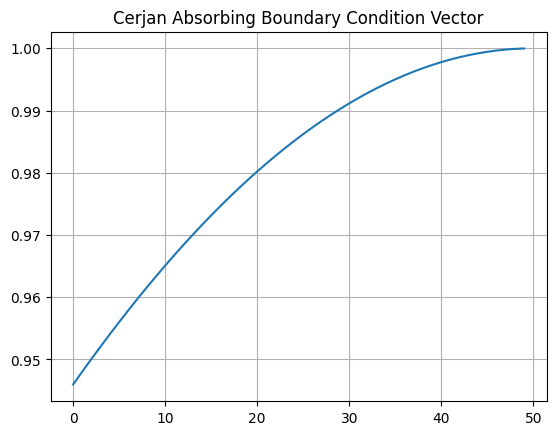

In [13]:
import matplotlib.pyplot as plt

A = wf_Marmousi_Acoustico.createCerjanVector() 
plt.figure()
plt.plot(A)
plt.title("Cerjan Absorbing Boundary Condition Vector")
plt.grid()
plt.show()

Validação da modelagem numérica a partir da solução analítica

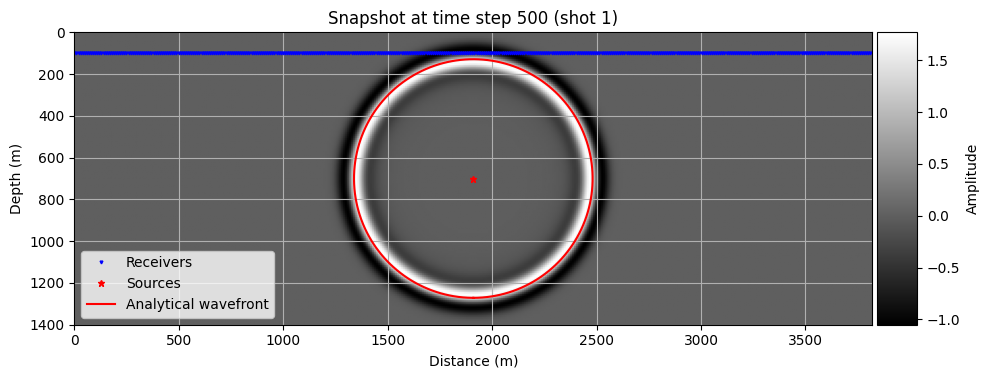

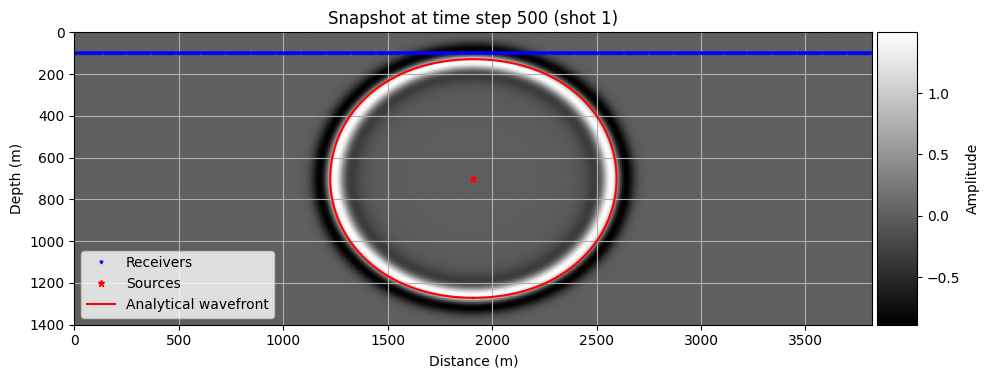

In [ ]:
wf_Analytical_Acoustic.viewSnapshotAnalyticalComparison()
wf_Analytical_VTI.viewSnapshotAnalyticalComparison()

Snapshots da demonstração e solução do artefato produzido pela onda qSV

info: 1 snapshots saved to ../outputs/snapshots/


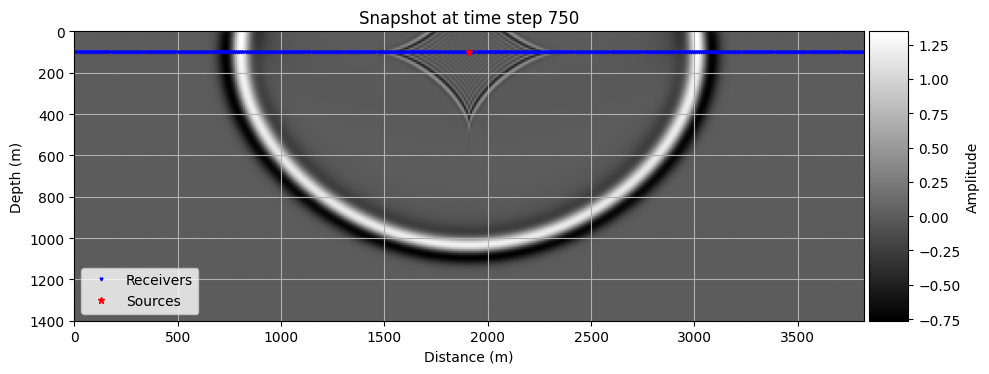

info: 1 snapshots saved to ../outputs/snapshots/


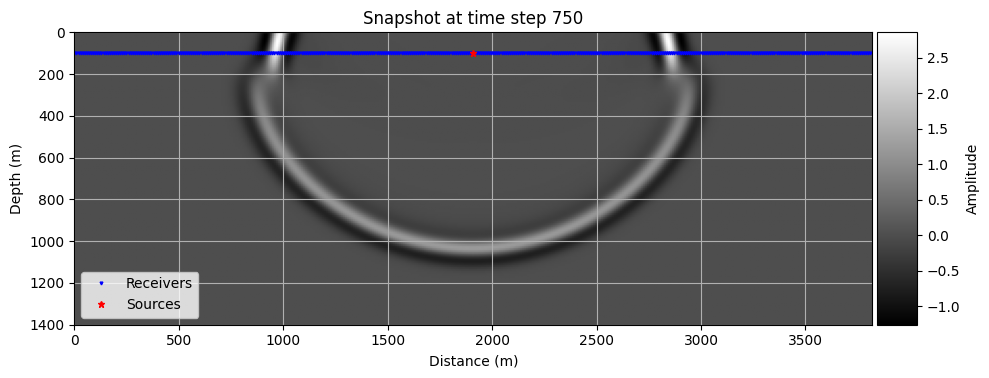

In [ ]:
wf_QSV.viewSnapshot()
wf_QSV_Solution.viewSnapshot()

Snapshots Marmousi Acústico

info: 3 snapshots saved to ../outputs/snapshots/


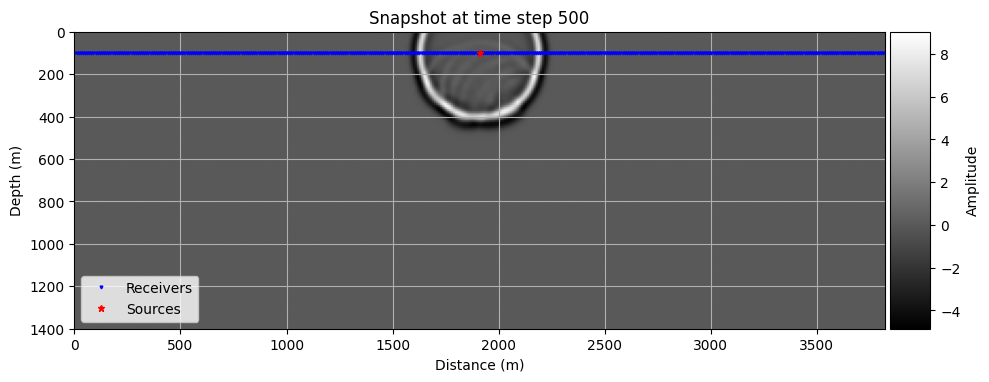

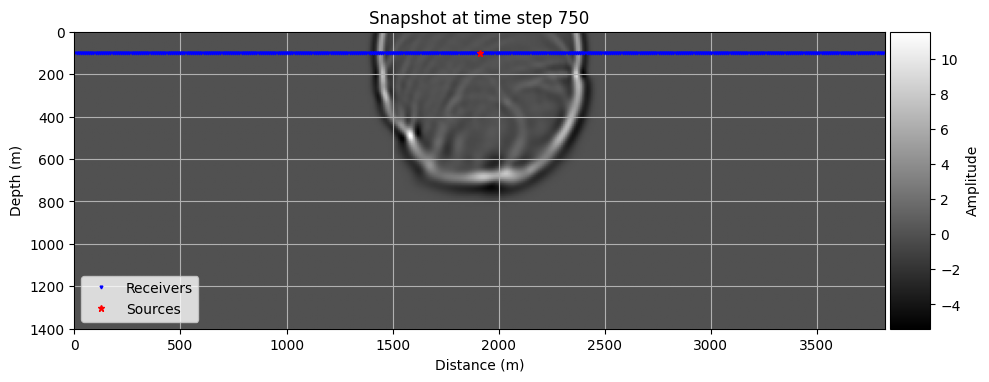

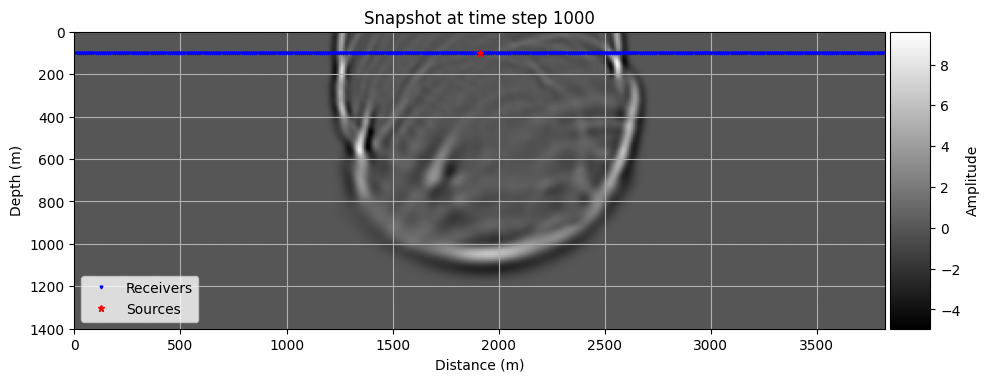

In [ ]:
wf_Marmousi_Acoustico.viewSnapshot()

Snapshot Marmousi VTI

info: 3 snapshots saved to ../outputs/snapshots/


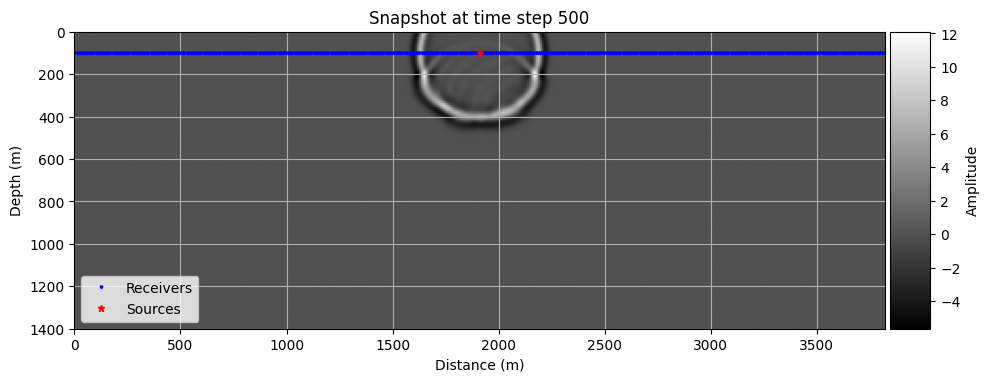

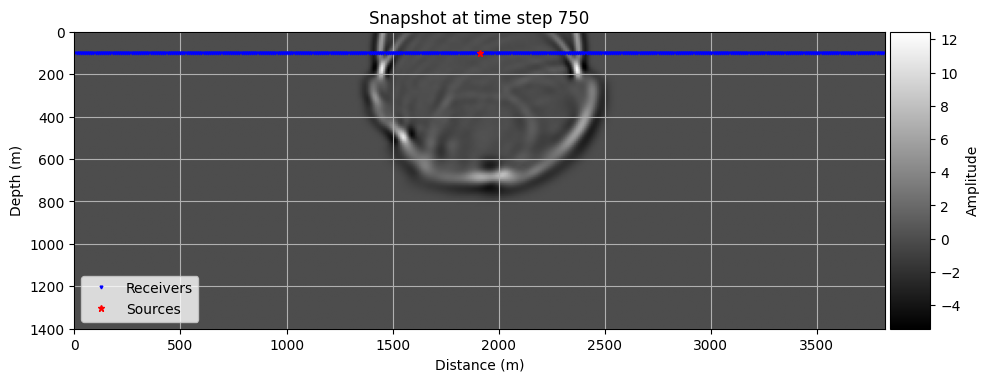

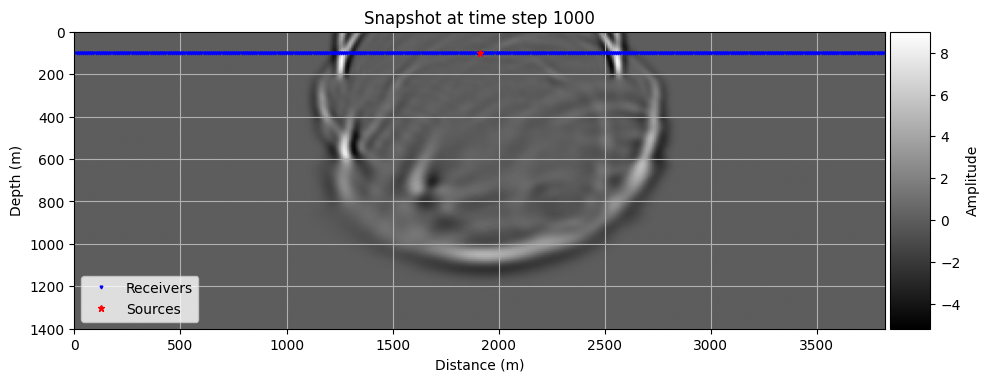

In [ ]:
wf_Marmousi_VTI.viewSnapshot()

Sismograma Marmousi acústico


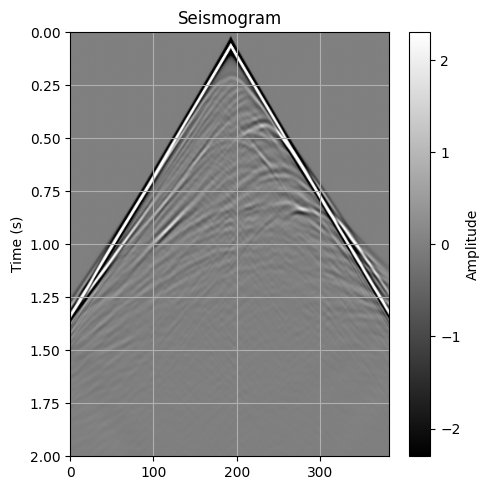

In [ ]:
wf_Marmousi_Acoustico.viewSeismogram()

Sismograma Marmousi VTI

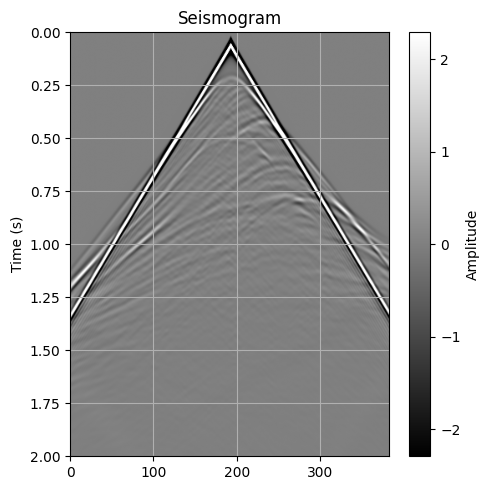

In [ ]:
wf_Marmousi_VTI.viewSeismogram()

Comparação entre os sismogramas acústico e Vti para o modelo Marmousi

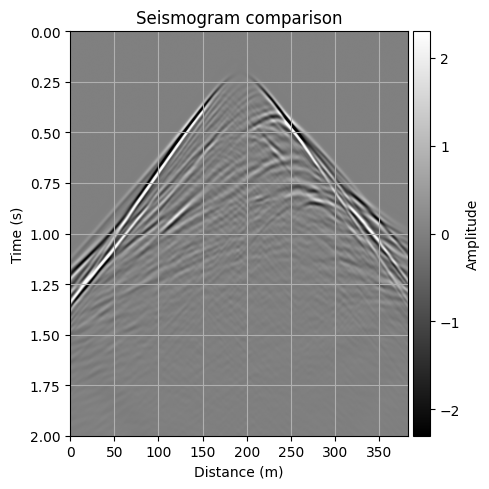

In [ ]:
wf_Marmousi_Acoustico.viewSeismogramComparison()

Sismogramas da onda qSV 

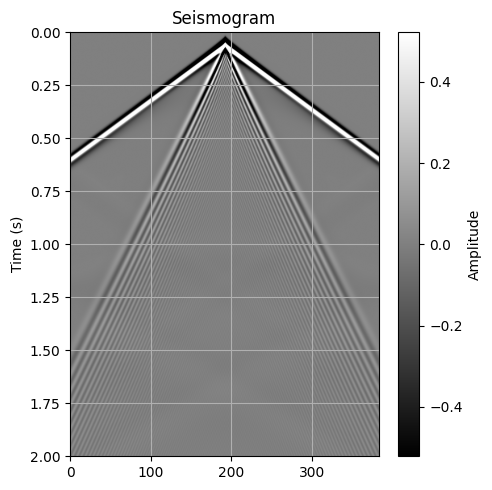

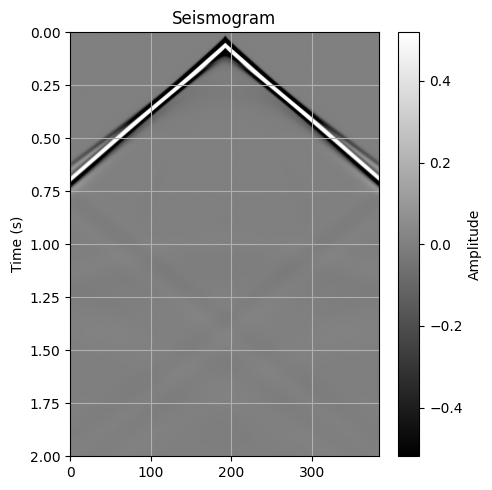

In [ ]:
wf_QSV.viewSeismogram()
wf_QSV_Solution.viewSeismogram()